# ASM 591 - Lab 7

# Deep Learning-Based Image Classification

### 1. Introduction 
Deep learning is a subset of machine learning which is a subset of artificial intellignece. Deep learning uses convolutional neural networks (CNN)s to extract important features from particular datasets that used to train models for learning specific patterns. One of the most popular and widely used applications of deep learning is image classification. Image classification refers to the identification of different objects that are represented within images. Deep learning-based image classification models require large datasets with hundereds of thousands of images for learning features accurately. 

<img src="img/deep.PNG" width=300 height=300 />

In order to train image classification models, a dataset comprised of different classes is first provided. Each class consists of hunderds to thousands of images. As the number of images used for training image classification models increases, CNN can help train the models better, resulting in higher accuracies. One of the most popular dataset in the MNIST dataset consisting of 10 classes for the numbers 0 to 9. Each class consists of multiple images. In addition, "Fashion MNIST" is another popular dataset that is commonly used as a benchmast. Both of these datasets will be used in this lab for training deep learning models capable of identifying the classes present in each of these datasets.

The image below shows how a sliding window moves across an image to learn specific features using CNNs.

<img src="img/cnn1.gif" width=300 height=300 />     

### 2. Language and Framework
There are multiple different programming languages and frameworks that are used for training deep learning models. Python is currently the most popular programming language that is used. In addition, two common frameworks are used, namely TensorFlow and PyTorch. However, as TesnorFlow was first introduced, it is more commonly used with a larger community for support. Keras is a framework that is built on top of TensorFlow which helped to easily implement deep learning. Therefore, for the purpose of this lab, Keras and TensorFlow will be used. 

<img src="img/keras.jpg" width=500 height=200 />

### 3. Import Libraries

In [1]:
# first import the tensorflow and keras libraries
import tensorflow as tf

In [2]:
# import additional libraries for arrays and plotting
import numpy as np
import matplotlib.pyplot as plt

### 4. Import Dataset
The "MNIST" and "Fashion MNIST" datasets are benchmark datasets that avaialble to download from tensorflow. Run the code block below in order to obtain the dataset in the correct format. The images below  shows how CNN's learn important features from the MNIST dataset.

<img src="img/cnn2.gif" width=300 height=300 />

In [3]:
# import the MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train_mnist.shape

(60000, 28, 28)

After displaying the shape of the training dataset, you will see (60000,28,28). Here, 60000 represents the number of images that are present and 28 represents that the width and the height of the images is 28 (28 x 28 pixels).

However, we will not be able to use the dataset with this shape. Therefore, it needs to be resized and normailized. This is because, in the Keras and Tensorflow frameworks, the input needs to be in an array of 4 dimensions while we currently have 3.

In [5]:
x_train_mnist = x_train_mnist.reshape(60000, 28, 28, 1)
x_test_mnist = x_test_mnist.reshape(10000, 28, 28, 1)
input_shape = (28,28,1) # this is the input shape for each of the image that will be used for training

In [6]:
y_train_mnist.shape

(60000,)

y_train_mnist and y_test_mnist simply represent the labels for each of the image that is present. Therefore, these don't need to be resized.

### 5. Build Model Network Architecture

In [7]:
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# use sequential to define the model before adding layers
model = tf.keras.Sequential()
model.add(Conv2D(64,
                (3,3),
                activation='relu',
                input_shape=input_shape)) # the input shape is only provided to the first layer in the architecture and the following layers will automatically use this.

# each convolutional layer is followed by a maxpooling layer
model.add(MaxPooling2D(2,2))

# add a few more convolutional layers with reduced number of nodes.
model.add(Conv2D(32,
                (3,3),
                activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16,
                (3,3),
                activation='relu'))
model.add(MaxPooling2D(2,2))

# after adding all the convolutional layers, we have flatten the network in order to make out predictions and assign classes
model.add(Flatten())

# after the architecture is flattened, we have to add fully convolutional layers or dense layers
model.add(Dense(128,
               activation='relu'))

# finally, we add the output layer where the activation function must be a softmax and the number of nodes must be equal to the number of classes
model.add(Dense(10,
               activation='softmax'))


In [8]:
# show the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 16)         0

### 6. Set The Hyperparameters and Train The Model

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train_mnist, y=y_train_mnist, validation_data=(x_test_mnist, y_test_mnist), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 4ms/step - loss: 0.3615 - accuracy: 0.8920 - val_loss: 0.1858 - val_accuracy: 0.9441
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1301 - accuracy: 0.9608 - val_loss: 0.1368 - val_accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1034 - accuracy: 0.9687 - val_loss: 0.0926 - val_accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0862 - accuracy: 0.9734 - val_loss: 0.0886 - val_accuracy: 0.9721
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0749 - accuracy: 0.9775 - val_loss: 0.0858 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0698 - accuracy: 0.9787 - val_loss: 0.0882 - val_accuracy: 0.9738
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0618 - accuracy: 0.9804 - val_loss: 0.0804 - val_accuracy

### 7. Evaluate The Model and Visualize The Results

In [10]:
# print out the testing accuracy
model.evaluate(x_test_mnist, y_test_mnist)

313/313 [==============================] - 1s 3ms/step - loss: 0.0859 - accuracy: 0.9781


[0.08585502952337265, 0.9781000018119812]

1/1 [==============================] - 0s 136ms/step
9


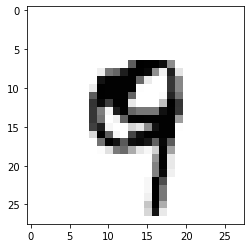

In [11]:
import matplotlib.pyplot as plt

image_index = 4444
plt.imshow(x_test_mnist[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test_mnist[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

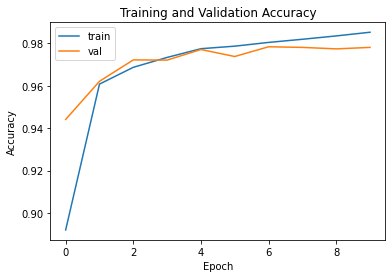

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

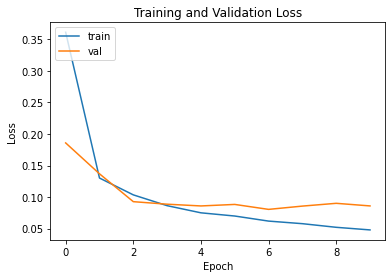

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Ans:

### 8. Now Repeat The Steps For The Fashion MNIST Dataset

In [14]:
# import the Fashion MNIST dataset
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The dataset has been imported. Use the same approach as above to resize the dataset, build the model, train the model, and evaluate the model.

In [15]:
# Resize and Normalize the dataset
x_train_mnist = x_train_mnist.reshape(60000, 28, 28, 1)
x_test_mnist = x_test_mnist.reshape(10000, 28, 28, 1)
input_shape = (28,28,1) # this is the input shape for each of the image that will be used for training

In [16]:
# Build the Neural Network Model Architecture
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# use sequential to define the model before adding layers
model = tf.keras.Sequential()
model.add(Conv2D(64,
                (3,3),
                activation='relu',
                input_shape=input_shape)) # the input shape is only provided to the first layer in the architecture and the following layers will automatically use this.

# each convolutional layer is followed by a maxpooling layer
model.add(MaxPooling2D(2,2))

# add a few more convolutional layers with reduced number of nodes.
model.add(Conv2D(32,
                (3,3),
                activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16,
                (3,3),
                activation='relu'))
model.add(MaxPooling2D(2,2))

# after adding all the convolutional layers, we have flatten the network in order to make out predictions and assign classes
model.add(Flatten())

# after the architecture is flattened, we have to add fully convolutional layers or dense layers
model.add(Dense(128,
               activation='relu'))

# finally, we add the output layer where the activation function must be a softmax and the number of nodes must be equal to the number of classes
model.add(Dense(10,
               activation='softmax'))

In [17]:
# Train the Model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train_mnist, y=y_train_mnist, validation_data=(x_test_mnist, y_test_mnist), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4762 - accuracy: 0.8523 - val_loss: 0.1954 - val_accuracy: 0.9384
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1717 - accuracy: 0.9480 - val_loss: 0.1313 - val_accuracy: 0.9608
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1315 - accuracy: 0.9608 - val_loss: 0.1374 - val_accuracy: 0.9608
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1079 - accuracy: 0.9672 - val_loss: 0.0963 - val_accuracy: 0.9711
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0918 - accuracy: 0.9724 - val_loss: 0.1007 - val_accuracy: 0.9734
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0808 - accuracy: 0.9751 - val_loss: 0.1050 - val_accuracy: 0.9702
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0724 - accuracy: 0.9777 - val_loss: 0.1042 - val_accuracy:

1/1 [==============================] - 0s 222ms/step
9


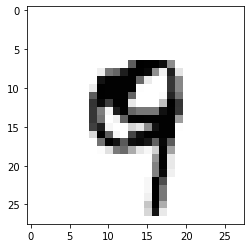

In [18]:
# Evaluate the Model
model.evaluate(x_test_mnist, y_test_mnist)

import matplotlib.pyplot as plt

image_index = 4444
plt.imshow(x_test_mnist[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test_mnist[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

## Question: What can you say about the training of this model by looking at the accuracy and loss plots?

### 9. Transfer Learning
You must have notices that training your model takes a long time. This is because a model was built and trained from scratch. This means that the model that was created had no prior knowledge and everything was learnt from scratch. Although you obtained high accuracies, this is not always that case due to limited availability of large datasets. Therefore, we introduce the concept of transfer learning. Transfer learning is a technique used for training deep learning models where pre-trained weights are obtained and used as priors for training new models. The pre-trained weights are usually obtained from models that were trained on large datasets with multiple classes. It is not necessary for the pre-trained weights to be obtaine from a model that was trained on the same dataset, nor the same application.

Pre-trained weights can be loaded into your custom defined models from part 5 of this lab. However, over the past decade, multiple netowrk architectures have been developed that can used with the pre-trained weights. For this lab, you will be using the VGG16 network architecture as shown below. This network architecture can be easily loaded from the Keras and TensorFlow libraries. 

<img src="img/vgg.png" width=500 height=200 />

A common dataset that is used for obtain pre-trained weights is the ImageNet dataset. The pre-trained weights are already avaialble from Keras and TensorFlow. In this section, you will be loading pre-trained weights into popular network architectures for training the same models.

<img src="img/Imagenet.jpg" width=500 height=200 />

In [19]:
# load the VGG16 model with the ImageNet pre-trained weights
tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

553467096/553467096 [==============================] - 2s 0us/step


In [21]:
# the code below has been provided to you for preparing the dataset
from tensorflow.keras.utils import img_to_array, array_to_img
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

x_train_mnist = np.dstack([x_train_mnist] * 3)
x_test_mnist = np.dstack([x_test_mnist] * 3)
x_train_mnist.shape, x_test_mnist.shape

x_train_mnist = x_train_mnist.reshape(-1, 28,28,3)
x_test_mnist = x_test_mnist.reshape (-1,28,28,3)
x_train_mnist.shape, x_test_mnist.shape

x_train_mnist = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train_mnist])
x_test_mnist = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test_mnist])
#train_x = preprocess_input(x)

x_train_mnist.shape, x_test_mnist.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [22]:
# set the image width and height equal to 224
# this is because, as shown in the image of the VGG16 network architecture above, the input to the first layer has dimension of 224 x 224 x3 (where 3 represents the RGB channles for the image)
# if we were using black and white images, there are no RGB channels, therefore the size would have been 224 x 224 x 1
batch_size = 16  # set the batch size equal to 16
epochs = 100  # define the number of epochs to train for (use 100 for this lab)
input_shape = (48,48,3) # this is the input shape for each of the image that will be used for training

In [23]:
# load in the custom VGG16 model and build the architecture
inp = Input((48, 48, 3))
pre_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_tensor=inp, input_shape=(48, 48, 3), pooling='avg')
pre_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [27]:
x = pre_model.output
out = Dense(10, activation='softmax')(x)
complete_model = Model(inp, out)

complete_model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
complete_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [25]:
for layer in complete_model.layers[:-1]:
    layer.trainable=False
complete_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [26]:
# now lets train the pre-trained model
complete_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = complete_model.fit(x=x_train_mnist, y=y_train_mnist, batch_size=128, validation_data=(x_test_mnist, y_test_mnist), epochs=10)

Epoch 1/10
469/469 [==============================] - 23s 46ms/step - loss: 1.8780 - accuracy: 0.7405 - val_loss: 0.5161 - val_accuracy: 0.8670
Epoch 2/10
469/469 [==============================] - 21s 44ms/step - loss: 0.4076 - accuracy: 0.8903 - val_loss: 0.3361 - val_accuracy: 0.9064
Epoch 3/10
469/469 [==============================] - 21s 45ms/step - loss: 0.3101 - accuracy: 0.9096 - val_loss: 0.2851 - val_accuracy: 0.9151
Epoch 4/10
469/469 [==============================] - 21s 44ms/step - loss: 0.2698 - accuracy: 0.9188 - val_loss: 0.2939 - val_accuracy: 0.9092
Epoch 5/10
469/469 [==============================] - 21s 44ms/step - loss: 0.2510 - accuracy: 0.9226 - val_loss: 0.2718 - val_accuracy: 0.9208
Epoch 6/10
469/469 [==============================] - 21s 44ms/step - loss: 0.2455 - accuracy: 0.9251 - val_loss: 0.2544 - val_accuracy: 0.9218
Epoch 7/10
469/469 [==============================] - 21s 44ms/step - loss: 0.2378 - accuracy: 0.9259 - val_loss: 0.2644 - val_accuracy:

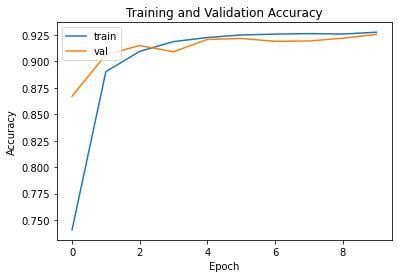

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

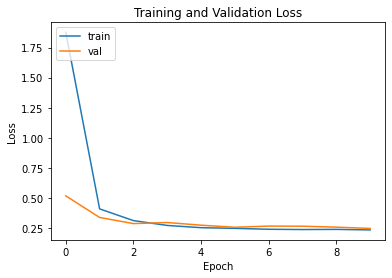

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Question: What can you say about the training of this model by looking at the accuracy and loss plots?

## Ans: